# Prototype Linear Regression Model

# Import 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 

In [29]:
df = pd.read_csv('../data/interim_data/clean_ds.csv') # for semplicity i use the clean data (not the normalized one)

In [30]:
df.head()

,aggregated1,aggregated2,granular1,granular2,granular3,granular4,granular5,id
0,8.00,9.00,8.00,8.00,9.00,8.00,8.00,1
1,6.67,8.33,6.00,7.67,7.00,7.00,6.67,2
2,5.33,4.33,6.33,4.00,6.33,4.33,6.67,3
3,7.67,8.33,7.67,8.33,6.67,7.67,8.67,4
4,7.00,8.33,7.67,8.00,9.00,7.67,8.33,5


# Model

In [31]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

Define target and features 

In [51]:
target_cols = ['aggregated1', 'aggregated2']
feature_cols = ['granular1', 'granular2', 'granular3', 'granular4', 'granular5']

X = df[feature_cols].values
y = df[target_cols].values

Define train and test set

In [52]:
seed = 0
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state=seed)

The model

Define and train the model

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Eval

Metric eval 

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

r2 = r2_score(y_true = y_test, y_pred = y_pred)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred = y_pred)

r2_agg1 = r2_score(y_true = y_test[:,0], y_pred = y_pred[:,0])
mae_agg1 = mean_absolute_error(y_true = y_test[:,0], y_pred = y_pred[:,0])
mape_agg1 = mean_absolute_percentage_error(y_true = y_test[:,0], y_pred = y_pred[:,0])

r2_agg2 = r2_score(y_true = y_test[:,1], y_pred = y_pred[:,1])
mae_agg2 = mean_absolute_error(y_true = y_test[:,1], y_pred = y_pred[:,1])
mape_agg2 = mean_absolute_percentage_error(y_true = y_test[:,1], y_pred = y_pred[:,1])

print("---- Overall ----")
print(f"R2  : {r2:.4f}")
print(f"MAE : {mae:.4f}")
print(f"MAPE: {mape:.4f}")

print("\n---- Agg1 ----")
print(f"R2  : {r2_agg1:.4f}")
print(f"MAE : {mae_agg1:.4f}")
print(f"MAPE: {mape_agg1:.4f}")

print("\n---- Agg2 ----")
print(f"R2  : {r2_agg2:.4f}")
print(f"MAE : {mae_agg2:.4f}")
print(f"MAPE: {mape_agg2:.4f}")

---- Overall ----
R2  : 0.9156
MAE : 0.3836
MAPE: 0.0701

---- Agg1 ----
R2  : 0.9123
MAE : 0.4517
MAPE: 0.0841

---- Agg2 ----
R2  : 0.9189
MAE : 0.3155
MAPE: 0.0561


Plot 

In [56]:
import datetime, os, json

# Build the exp folder 
timestamp = datetime.datetime.now().strftime("%Y%m%d_$H%M%S")
exp_name = f"exp_seed{seed}"
exp_dir = f"../report/experiment_plots/LG_{timestamp}_{exp_name}"
os.makedirs(exp_dir, exist_ok=True)

# Save the config 
config = {
    "model": "linearRegression",
    "seed": seed,
    "test_size": test_size
}

with open(f"{exp_dir}/config.json", "w") as f:
    json.dump(config, f, indent=4)

# Save the metrics 
metrics = {
    "overall": {"r2": r2, "mae": mae, "mape": mape},
    "agg1": {"r2": r2_agg1, "mae": mae_agg1, "mape": mape_agg1},
    "agg2": {"r2": r2_agg2, "mae": mae_agg2, "mape": mape_agg2},
}

with open(f"{exp_dir}/metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

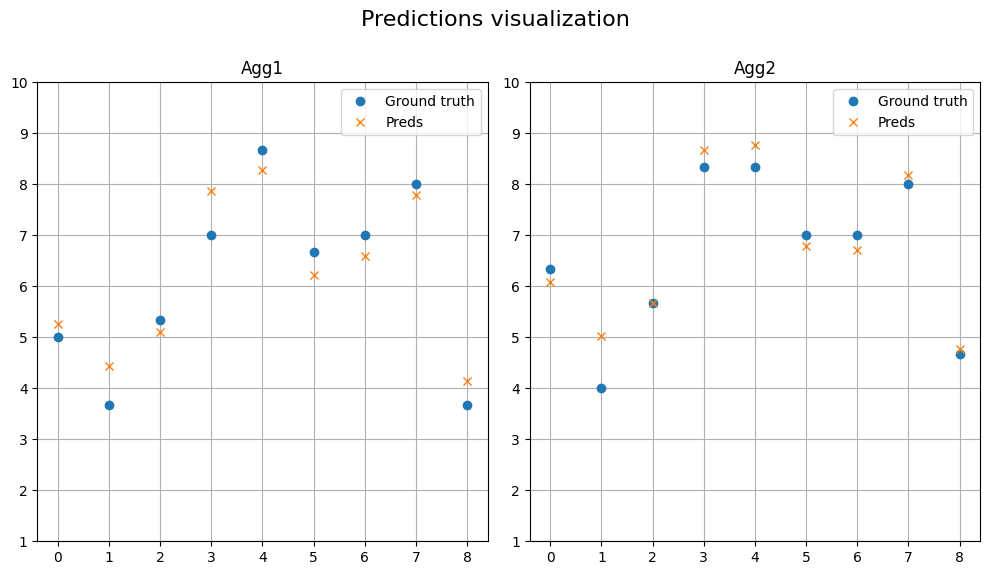

In [57]:
plt.figure(figsize=(10,6))

# Titolo generale
plt.suptitle("Predictions visualization", fontsize=16, y=0.95)

plt.subplot(1,2,1)
plt.title("Agg1")
plt.plot(y_test[:,0], marker='o', linestyle='None', label='Ground truth')
plt.plot(y_pred[:,0], marker='x', linestyle='None', label='Preds')
plt.ylim(1,10)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Agg2")
plt.plot(y_test[:,1], marker='o', linestyle='None', label='Ground truth')
plt.plot(y_pred[:,1], marker='x', linestyle='None', label='Preds')
plt.ylim(1,10)
plt.legend()
plt.grid(True)

plt.savefig(f"{exp_dir}/se_preds.png", dpi=150)

# Migliora il layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Analyse the trained model

In [80]:
# Coefficients matrix: shape (n_features, n_targets)
coef = model.coef_

# Intercepts: one per target
intercept = model.intercept_

# Wrap into a nice DataFrame
weights_df = pd.DataFrame(
    coef,
    index = target_cols,          
    columns =feature_cols
)
print("Intercepts:", intercept)
display(weights_df)

# 
dict_a1 = {}
dict_a2 = {}
dict_a1['intercept'] = intercept[0]
dict_a2['intercept'] = intercept[1]
for i in range(5):
    dict_a1[f'granular{i+1}'] = coef[0, i]
for i in range(5):
    dict_a2[f'granular{i+1}'] = coef[1, i]
export_weights = {
    "agg1": dict_a1,
    "agg2": dict_a2
} 
with open(f"{exp_dir}/lg_weights.json", 'w') as f:
    json.dump(export_weights, f, indent=4)


Intercepts: [-2.55258301 -4.54746204]


,granular1,granular2,granular3,granular4,granular5
aggregated1,0.798215,0.197147,0.084307,0.091086,0.150929
aggregated2,0.641381,0.689773,0.280875,-0.050390,0.077389


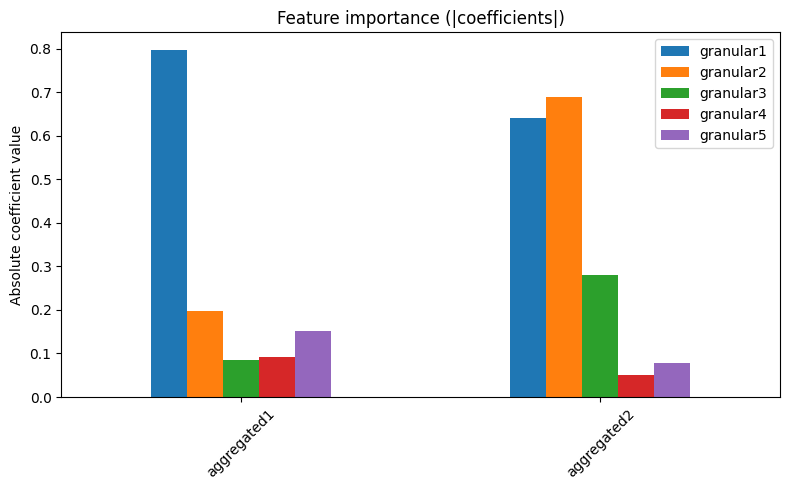

In [81]:
abs_weights = weights_df.abs()

abs_weights.plot(kind='bar', figsize=(8,5))
plt.title("Feature importance (|coefficients|)")
plt.ylabel("Absolute coefficient value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{exp_dir}/feature_importance.jpg", dpi = 150)
plt.show()